<a href="https://colab.research.google.com/github/mpantonucci/Bootcamp-DataScience/blob/main/Super_Desafio_Bootcamp_M%C3%B3dulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1054]:
import pandas as pd
import matplotlib.pyplot as plt

## Impacto da Pandemia de COVID no diagnóstico e tratamento do Cancêr de Mama (Brasil 2021)


Casos por Ano do tratamento segundo UF do tratamento

Diagnóstico Detalhado: C50 - Neoplasia maligna da mama , D05 - Carcinoma in situ da mama

Ano do diagnóstico: 2013-2021



In [1055]:
#leitura e adaptação do arquivo que será utilizado para a análise
#O Arquivo csv, contém a quantidade de casos de tratamento para o Cancer de Mama, por Estado, no Brasil, nos anos de 2013 até 2021.
dados_arquivo_brasil = pd.read_csv("/content/drive/MyDrive/Cursos/Bootcamp Data Science/casos_cancer_mama_brasil.csv", sep=';', encoding="ISO-8859-1")

#dropar as colunas 'Total' e 'Sem informação de Tratamento' por que não existem informações que ajudem na análise sobre os casos de Cancer de Mama / 2021
dados_arquivo_brasil = dados_arquivo_brasil.drop(' Total', axis=1)
dados_arquivo_brasil = dados_arquivo_brasil.drop('Sem informação de tratamento', axis=1)

#definir o index do dataframe
dados_arquivo_brasil = dados_arquivo_brasil.set_index('UF do tratamento')

#dropar a linha Total 'Total' e 'Sem informação de Tratamento' por que não existem informações que ajudem na análise sobre os casos de Cancer de Mama / 2021
dados_arquivo_brasil = dados_arquivo_brasil.drop('Total', axis=0)
dados_arquivo_brasil = dados_arquivo_brasil.drop('Sem informação de tratamento', axis=0)

dados_arquivo_brasil


,2013,2014,2015,2016,2017,2018,2019,2020,2021
UF do tratamento,,,,,,,,,
11 Rondônia,70,142,205,234,335,338,272,317,179
12 Acre,51,60,42,48,67,66,54,55,39
13 Amazonas,190,203,263,267,275,321,388,461,167
14 Roraima,19,42,41,34,53,34,42,65,36
15 Pará,384,409,426,496,601,632,723,654,376
16 Amapá,15,16,49,40,32,39,51,39,30
17 Tocantins,99,108,136,122,119,151,191,172,96
21 Maranhão,374,440,486,461,547,561,591,689,472
22 Piauí,356,457,447,565,477,559,612,503,338


Text(0.5, 0, 'Ano')

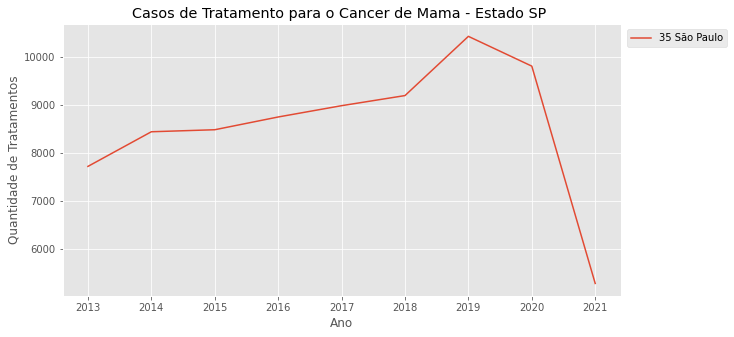

In [1056]:
#obter os casos de tratamento de cancer de Mama para o Estado de SP
dados_arquivo_sp = dados_arquivo_brasil[dados_arquivo_brasil.index.str.contains('São Paulo')]

ax = dados_arquivo_sp.T.plot(figsize=(10,5))
ax.legend(loc="upper right", bbox_to_anchor=(1.20, 1))
plt.style.use("ggplot")
plt.title("Casos de Tratamento para o Cancer de Mama - Estado SP ")
plt.ylabel("Quantidade de Tratamentos")
plt.xlabel("Ano")

Text(0.5, 0, 'Ano')

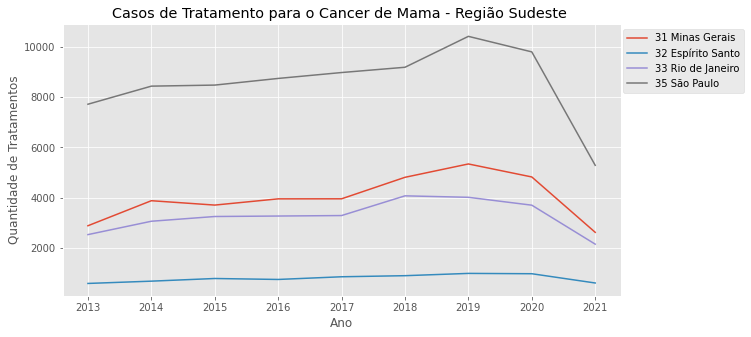

In [1057]:
#comparar o estado de SP com a região SUDESTE
dados_regiao_sudeste = dados_arquivo_brasil[dados_arquivo_brasil.index.str.startswith('3')]

ax = dados_regiao_sudeste.T.plot(figsize=(10,5))
ax.legend(loc="upper right", bbox_to_anchor=(1.23, 1))
plt.style.use("ggplot")
plt.title("Casos de Tratamento para o Cancer de Mama - Região Sudeste ")
plt.ylabel("Quantidade de Tratamentos")
plt.xlabel("Ano")

Text(0.5, 0, 'Ano')

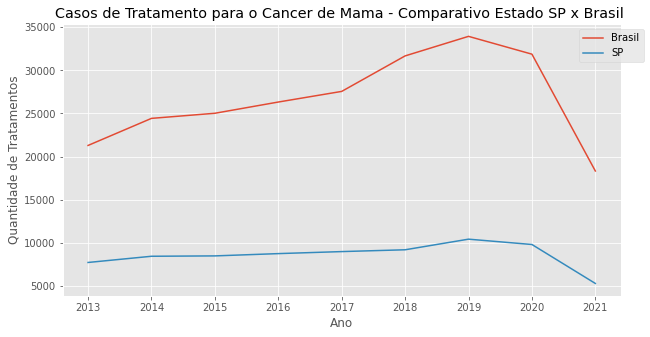

In [1058]:
#Comparar o estado de SP com o Total Brasil
dados_total_brasil = pd.DataFrame(dados_arquivo_brasil.drop('35 São Paulo', axis=0).sum(), columns=["Total"])
dados_total_brasil = dados_total_brasil.T
dados_total_brasil = pd.merge(dados_total_brasil, dados_arquivo_sp, how='outer')
dados_total_brasil = dados_total_brasil.T
dados_total_brasil = dados_total_brasil.rename(columns={0: 'Brasil', 1: 'SP'})
ax = dados_total_brasil.plot(figsize=(10,5))
ax.legend(loc="upper right", bbox_to_anchor=(1.05, 1))
plt.style.use("ggplot")
plt.title("Casos de Tratamento para o Cancer de Mama - Comparativo Estado SP x Brasil ")
plt.ylabel("Quantidade de Tratamentos")
plt.xlabel("Ano")



# Análise de Total de Pacientes diagnosticados com Cancêr de Mama 
Casos por Ano do diagnóstico segundo UF do tratamento

Diagnóstico Detalhado: C50 - Neoplasia maligna da mama , D05 - Carcinoma in situ da mama

Ano do diagnóstico: 2013-2021

In [1059]:
#leitura e adaptação do arquivo que será utilizado para a análise
#O Arquivo csv, contém a quantidade de casos de tratamento para o Cancer de Mama, por Estado, no Brasil, nos anos de 2013 até 2021.
diagnosticos_cancer_brasil = pd.read_csv("/content/drive/MyDrive/Cursos/Bootcamp Data Science/diagnosticos_cancer_mama_brasil.csv", sep=';', encoding="ISO-8859-1")

#dropar as colunas 'Total' por que não existem informações que ajudem na análise sobre os casos de Cancer de Mama / 2021
diagnosticos_cancer_brasil = diagnosticos_cancer_brasil.drop(' Total', axis=1)

#definir o index do dataframe
diagnosticos_cancer_brasil = diagnosticos_cancer_brasil.set_index('UF do tratamento') 

#dropar a linha Total 'Total' e 'Sem informação de Tratamento' por que não existem informações que ajudem na análise sobre os casos de Cancer de Mama / 2021
diagnosticos_cancer_brasil = diagnosticos_cancer_brasil.drop('Total', axis=0)
diagnosticos_cancer_brasil = diagnosticos_cancer_brasil.drop('Sem informação de tratamento', axis=0)

diagnosticos_cancer_brasil

,2013,2014,2015,2016,2017,2018,2019,2020,2021
UF do tratamento,,,,,,,,,
11 Rondônia,151,179,204,276,309,282,288,292,111
12 Acre,74,52,43,62,57,64,52,49,29
13 Amazonas,240,229,285,274,278,333,422,406,68
14 Roraima,40,39,41,39,48,34,42,52,31
15 Pará,540,462,408,542,575,655,720,602,197
16 Amapá,28,30,36,34,36,40,49,44,14
17 Tocantins,121,135,126,121,123,169,172,163,64
21 Maranhão,507,480,459,514,518,606,624,649,264
22 Piauí,467,473,495,524,496,580,607,463,209


<Figure size 1440x432 with 0 Axes>

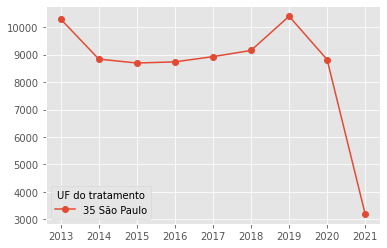

In [1060]:
#obter os casos de diagnósticos de cancer de Mama para o Estado de SP
diagnosticos_sp = diagnosticos_cancer_brasil[dados_arquivo_brasil.index.str.contains('São Paulo')]

plt.figure(figsize=(20,6))
#plt.subplot(121)
#plt.style.use("ggplot")
#plt.title("Casos de Diagnósticos para o Cancer de Mama - Estado SP ")
#plt.ylabel("Quantidade de Diagnósticos")
#plt.xlabel("Ano")
diagnosticos_sp.T.plot(marker='o')

#plt.subplot(122)
#plt.style.use("ggplot")
#plt.title("Casos de Tratamento para o Cancer de Mama - Estado SP ")
#plt.ylabel("Quantidade de Tratamentos")
#plt.xlabel("Ano")
#dados_arquivo_sp.T.plot(marker='o')



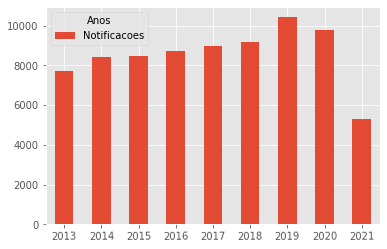

In [1061]:
dados_arquivo_sp = pd.read_csv("/content/drive/MyDrive/Cursos/Bootcamp Data Science/casos_cancer_mama_sao_paulo.csv", sep=';', encoding="ISO-8859-1")
dados = dados_arquivo_sp.drop(' Total', axis=1)
dados = dados.drop('UF do tratamento', axis=1)
dados = dados.drop(1, axis=0)
dados = dados.T
dados = dados.rename(columns = {0: 'Notificacoes'}, inplace = False)
dados = dados.rename_axis('Anos', axis=1)
ax = dados.plot.bar(rot=1)

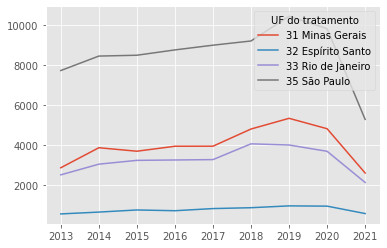

In [1062]:
dados_arquivo_brasil = pd.read_csv("/content/drive/MyDrive/Cursos/Bootcamp Data Science/casos_cancer_mama_brasil.csv", sep=';', encoding="ISO-8859-1")
dados_brasil = dados_arquivo_brasil.drop(' Total', axis=1)
dados_brasil = dados_brasil.drop('Sem informação de tratamento', axis=1)
dados_brasil = dados_brasil.set_index('UF do tratamento')

dados_brasil = dados_brasil.drop('Total', axis=0)
dados_brasil = dados_brasil.drop('Sem informação de tratamento', axis=0)
dados_brasil = dados_brasil.sort_index(axis=1)
dados_sudeste = dados_brasil[dados_brasil.index.str.startswith('3')]
dados_sudeste.T.plot()


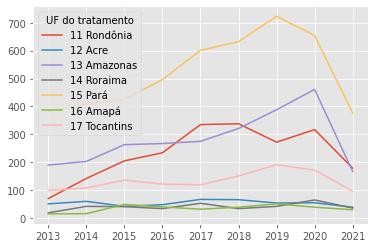

In [1063]:
dados_norte = dados_brasil[dados_brasil.index.str.startswith('1')]
dados_norte.T.plot()

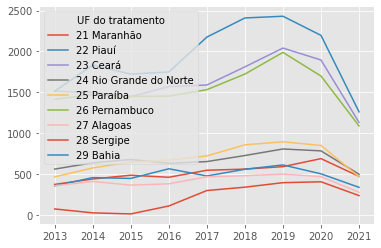

In [1064]:
dados_nordeste = dados_brasil[dados_brasil.index.str.startswith('2')]
dados_nordeste.T.plot()

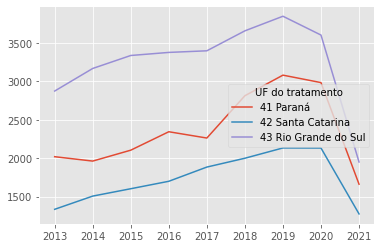

In [1065]:
dados_sul = dados_brasil[dados_brasil.index.str.startswith('4')]
dados_sul.T.plot()

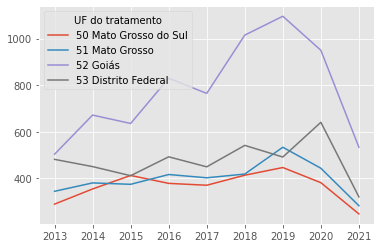

In [1066]:
dados_centro_oeste = dados_brasil[dados_brasil.index.str.startswith('5')]
dados_centro_oeste.T.plot()